##> **NAME -  POOJA (INTERN AT THE SPARKS FOUNDATION)**

##>**THE SPARKS FOUNDATION GRIP (Graduate Rotational Internship Program) JUNE 2021 BATCH**
### > **DATA SCIENCE AND BUSINESS ANALYTICS**

### > **TASK 2 :- FROM THE GIVEN ‘IRIS’ DATASET, PREDICT THE OPTIMUM NUMBER OF CLUSTERS AND REPRESENT IT VISUALLY**
###> **PREDICTION USING UNSUPERVISED ML**


### ***Importing the Libraries***

In [46]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.cluster import KMeans

### ***Loading the Data***

In [47]:
from google.colab import files
uploaded= files.upload()

Saving Iris.csv to Iris (1).csv


In [48]:
df_iris=pd.read_csv('Iris.csv')

In [49]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [50]:
# To Check first 5 rows of Dataset
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### ***Exploratory Data Analysis***

In [51]:
# Checking the Information of the Dataset
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [52]:
# Checking the shape of the dataset
df_iris.shape

(150, 6)

In [53]:
# Checking the Datatype of each Attribute 
df_iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [54]:
# Checking the presence of Missing values or null values
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [55]:
# Checking the Statistical Details of Dataset
df_iris.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150,NaN,NaN,NaN,75.5,43.4454,1,38.25,75.5,112.75,150
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-virginica,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Checking the Correlation between the Attributes
df_iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### ***Now Data Visualization***

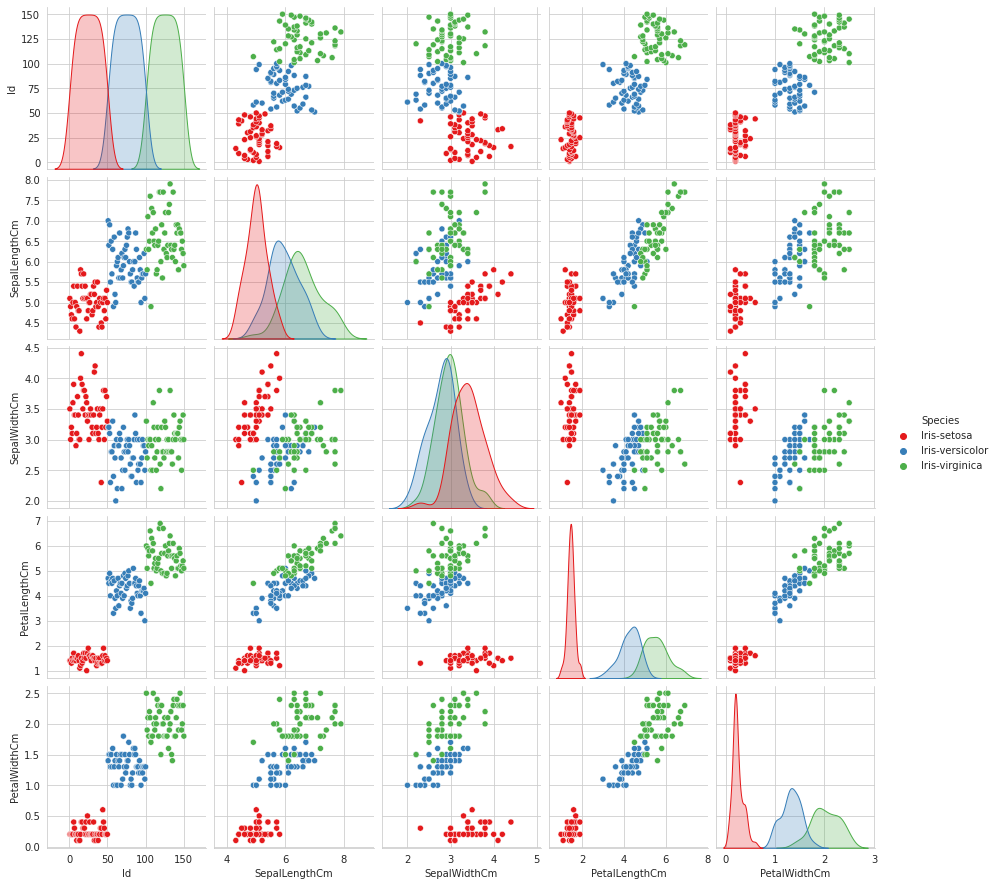

In [57]:
# Using pairplot
sns.pairplot(df_iris,hue = 'Species',palette = 'Set1')

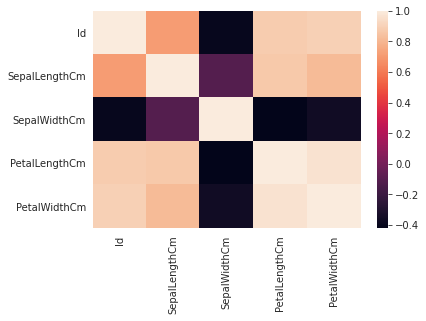

In [58]:
sns.heatmap(df_iris.corr())

### ***Let's find the optimum number of clusters for k-means classification***

In [59]:
x = df_iris.iloc[:, [0, 1, 2, 3]].values

In [60]:
within_cluster_sum_of_squares = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    within_cluster_sum_of_squares.append(kmeans.inertia_)

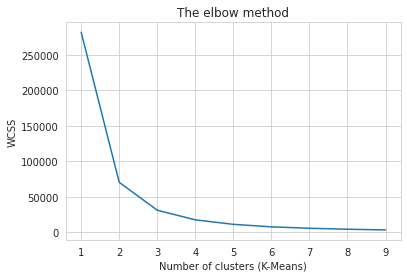

In [61]:
plt.plot(range(1, 10), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters (K-Means)')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

##### **from the above graph we can see that the elbow curve start at K=3, therefore, we choose the optimum number of clusters as 3.**

### ***Now Applying K-means to the dataset / Creating the K-means classifier***

In [62]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [63]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### ***Now Visualizing the clusters - On the first two columns***

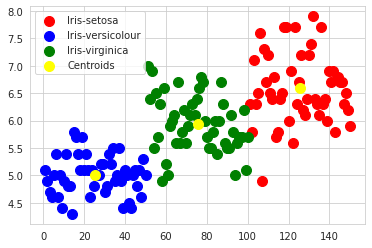

In [64]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

##***Thank You***